In [1]:
from keras.models import model_from_json

Using TensorFlow backend.


In [2]:
json_file = open('./model/covnet-questions.json', 'r')
model = model_from_json(json_file.read())
json_file.close()

In [3]:
model.load_weights('./model/covnet-questions.h5')

In [4]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
import numpy as np

In [6]:
data = np.load('./data/unclassified.npz')

In [7]:
images = data['data']

In [8]:
original = data['data']

In [9]:
import matplotlib.pyplot as plt

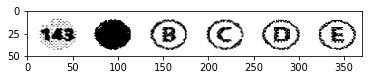

In [10]:
plt.imshow(images[255], cmap=plt.cm.binary_r)
plt.show()

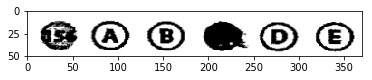

In [11]:
plt.imshow(images[20], cmap=plt.cm.binary_r)
plt.show()

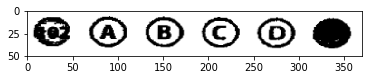

In [12]:
plt.imshow(images[42], cmap=plt.cm.binary_r)
plt.show()

In [13]:
images.shape

(85860, 50, 370)

In [14]:
images = images.reshape((85860, 50, 370, 1))
images = images.astype('float32') / 255

In [15]:
import cv2

In [18]:
for i in range(len(images)):
    pred = model.predict(np.array([images[i]]))
    opt = pred.argmax()
    acc = pred.max()
    if acc < 0.95:
        if acc < 0.5:
            cv2.imwrite('./data/new-classified/u/low_{0}_{1}.png'.format(opt, i), original[i])
        if acc < 0.75:
            cv2.imwrite('./data/new-classified/u/mid_{0}_{1}.png'.format(opt, i), original[i])
        else:
            cv2.imwrite('./data/new-classified/u/high_{0}_{1}.png'.format(opt, i), original[i])
        continue
    cv2.imwrite('./data/new-classified/{0}/nc_{1}.png'.format(opt, i), original[i])